In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

In [17]:
dataset=tf.keras.datasets.fashion_mnist
(X_train,Y_train),(X_test,Y_test)=dataset.load_data()
(X_train_deep,Y_train_deep),(X_test_deep,Y_test_deep)=dataset.load_data()

4


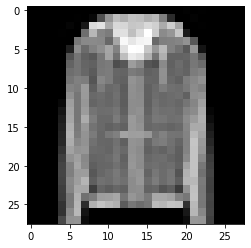

In [18]:
plt.imshow(X_train[28],cmap='gray')
print(Y_train[28])

In [19]:
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28)
(60000,)


In [20]:
X_train=X_train.reshape(60000,784)


In [21]:
X_train,X_valid,Y_train,Y_valid=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [22]:
model=tf.keras.models.Sequential([
    Dense(64,input_dim=784,activation='relu'),#input_layer
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')#output_layer

])

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics='accuracy')

In [24]:
model.fit(X_train,Y_train,validation_data=(X_valid,Y_valid),epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2.6851 - accuracy: 0.7103 - val_loss: 0.7994 - val_accuracy: 0.7604
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6708 - accuracy: 0.7858 - val_loss: 0.6389 - val_accuracy: 0.7949
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5877 - accuracy: 0.8055 - val_loss: 0.5314 - val_accuracy: 0.8232
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5374 - accuracy: 0.8164 - val_loss: 0.4983 - val_accuracy: 0.8265
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5128 - accuracy: 0.8246 - val_loss: 0.4878 - val_accuracy: 0.8319
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4903 - accuracy: 0.8303 - val_loss: 0.4597 - val_accuracy: 0.8400
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4912 - accuracy: 0.8314 - val_loss: 0.5209 - val_accuracy:

In [25]:
print(X_test.shape)
print(Y_test.shape)
X_test=X_test.reshape(10000,784)
print(X_test.shape)


(10000, 28, 28)
(10000,)
(10000, 784)


In [26]:
accuracy = model.evaluate(X_test,Y_test)

print("accuracy =", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.5371 - accuracy: 0.8280
accuracy = [0.5371023416519165, 0.828000009059906]


In [27]:


X_train_deep,X_test_deep = X_train_deep/255.0, X_test_deep/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_deep,Y_train_deep, epochs=10)
model.evaluate(X_test_deep, Y_test_deep)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5345 - accuracy: 0.8113
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4017 - accuracy: 0.8543
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3679 - accuracy: 0.8655
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3453 - accuracy: 0.8727
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3305 - accuracy: 0.8779
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3158 - accuracy: 0.8827
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3061 - accuracy: 0.8855
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2984 - accuracy: 0.8888
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2900 - accuracy: 0.8912
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3353 

[0.33526381850242615, 0.8823000192642212]

In [28]:
X_train_deep, X_test_deep = X_train_deep / 255.0, X_test_deep / 255.0

X_train_deep=X_train_deep.reshape(X_train_deep.shape[0],X_train_deep.shape[1],X_train_deep.shape[2],1)
X_test_deep=X_test_deep.reshape(X_test_deep.shape[0],X_test_deep.shape[1],X_test_deep.shape[2],1)
deep_model=tf.keras.models.Sequential([
                                       layers.Conv2D(32,(5,5),activation='relu',input_shape=(28,28,1)),
                                       #layers.Conv2D(64,(3,3),activation='relu'),
                                       layers.Flatten(),
                                       layers.Dense(64,activation='relu'),
                                       layers.Dense(10,activation='softmax')
])
deep_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics='accuracy')

deep_model.fit(X_train_deep, Y_train_deep, epochs=2)
deep_model.evaluate(X_test_deep, Y_test_deep)

Epoch 1/2
1875/1875 [==============================] - 37s 19ms/step - loss: 0.8220 - accuracy: 0.7010
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 0.5461 - accuracy: 0.7987


[0.546076774597168, 0.7986999750137329]